In [5]:
!pip install shapely


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 476.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 701.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------

The convex hulls are not disjoint. The two classes are not linearly separable.


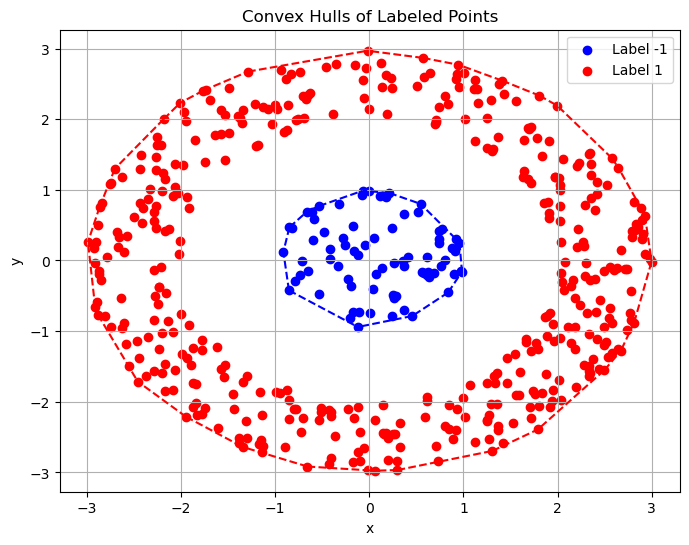

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon

# Load the CSV file
file_name = "input2.csv"  # Replace with your file name
data = pd.read_csv(file_name)

# Ensure the column names are appropriate
# Replace 'x', 'y', and 'label' with your actual column names if they differ
x = data['x']
y = data['y']
labels = data['label']

# Separate points by label
class_neg1 = data[labels == -1]
class_pos1 = data[labels == 1]

# Compute convex hulls
def compute_convex_hull(points):
    if len(points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(points)
        return hull
    return None

hull_neg1 = compute_convex_hull(class_neg1[['x', 'y']].values)
hull_pos1 = compute_convex_hull(class_pos1[['x', 'y']].values)

# Create polygons from convex hulls
def create_polygon(hull, points):
    if hull:
        vertices = hull.vertices
        polygon_points = points[vertices]
        return Polygon(polygon_points)
    return None

polygon_neg1 = create_polygon(hull_neg1, class_neg1[['x', 'y']].values)
polygon_pos1 = create_polygon(hull_pos1, class_pos1[['x', 'y']].values)

# Check if the convex hulls overlap
if polygon_neg1 and polygon_pos1:
    if polygon_neg1.intersects(polygon_pos1):
        print("The convex hulls are not disjoint. The two classes are not linearly separable.")
    else:
        print("The convex hulls are disjoint. The two classes might be linearly separable.")
else:
    print("One or both classes do not have enough points to form a convex hull.")

# Plot points and convex hulls
plt.figure(figsize=(8, 6))
plt.scatter(class_neg1['x'], class_neg1['y'], color='blue', label='Label -1')
plt.scatter(class_pos1['x'], class_pos1['y'], color='red', label='Label 1')

# Plot convex hulls if they exist
if hull_neg1:
    for simplex in hull_neg1.simplices:
        plt.plot(class_neg1.iloc[simplex, 0], class_neg1.iloc[simplex, 1], 'b--')
if hull_pos1:
    for simplex in hull_pos1.simplices:
        plt.plot(class_pos1.iloc[simplex, 0], class_pos1.iloc[simplex, 1], 'r--')

# Customize the plot
plt.title('Convex Hulls of Labeled Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
